# KMeans with norm L1

This demonstrates how results change when using norm L1 for a k-means algorithm.

In [1]:
from jyquickhelper import add_notebook_menu
add_notebook_menu()

In [2]:
%matplotlib inline

In [3]:
import matplotlib.pyplot as plt

## Simple datasets

In [4]:
import numpy
import numpy.random as rnd
N = 1000
X = numpy.zeros((N * 2, 2), dtype=numpy.float64)
X[:N] = rnd.rand(N, 2)
X[N:] = rnd.rand(N, 2)
#X[N:, 0] += 0.75
X[N:, 1] += 1
X[:N//10, 0] -= 2
X.shape

(2000, 2)

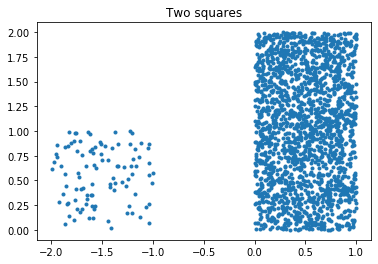

In [5]:
fig, ax = plt.subplots(1, 1)
ax.plot(X[:, 0], X[:, 1], '.')
ax.set_title("Two squares");

## Classic KMeans

It uses euclidean distance.

In [6]:
from sklearn.cluster import KMeans
km = KMeans(2)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [7]:
km.cluster_centers_

array([[0.25701017, 0.48916124],
       [0.51962715, 1.46900491]])

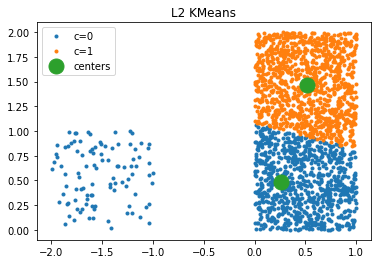

In [8]:
def plot_clusters(km_, X, ax):
    lab = km_.predict(X)
    for i in range(km_.cluster_centers_.shape[0]):
        sub = X[lab == i]
        ax.plot(sub[:, 0], sub[:, 1], '.', label='c=%d' % i)
    C = km_.cluster_centers_
    ax.plot(C[:, 0], C[:, 1], 'o', ms=15, label="centers")
    ax.legend()

fig, ax = plt.subplots(1, 1)
plot_clusters(km, X, ax)
ax.set_title("L2 KMeans");

## KMeans with L1 norm

In [9]:
from mlinsights.mlmodel import KMeansL1L2
kml1 = KMeansL1L2(2, norm='L1')
kml1.fit(X)

KMeansL1L2(algorithm='full', copy_x=True, init='k-means++', max_iter=300,
           n_clusters=2, n_init=10, n_jobs=None, norm='l1',
           precompute_distances='auto', random_state=None, tol=0.0001,
           verbose=0)

In [10]:
kml1.cluster_centers_

array([[0.41526759, 0.47949327],
       [0.51837524, 1.47608362]])

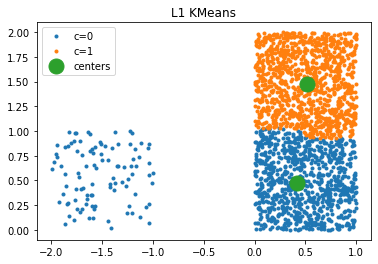

In [11]:
fig, ax = plt.subplots(1, 1)
plot_clusters(kml1, X, ax)
ax.set_title("L1 KMeans");

## When clusters are completely different

In [12]:
N = 1000
X = numpy.zeros((N * 2, 2), dtype=numpy.float64)
X[:N] = rnd.rand(N, 2)
X[N:] = rnd.rand(N, 2)
#X[N:, 0] += 0.75
X[N:, 1] += 1
X[:N//10, 0] -= 4
X.shape

(2000, 2)

In [13]:
km = KMeans(2)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [14]:
kml1 = KMeansL1L2(2, norm='L1')
kml1.fit(X)

KMeansL1L2(algorithm='full', copy_x=True, init='k-means++', max_iter=300,
           n_clusters=2, n_init=10, n_jobs=None, norm='l1',
           precompute_distances='auto', random_state=None, tol=0.0001,
           verbose=0)

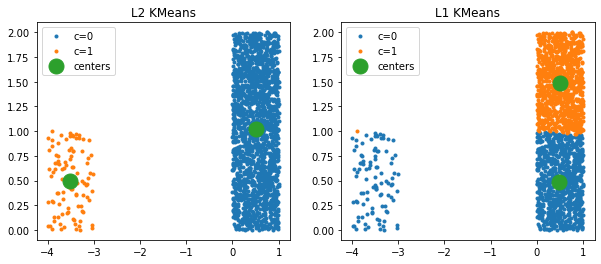

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(10, 4))
plot_clusters(km, X, ax[0])
plot_clusters(kml1, X, ax[1])
ax[0].set_title("L2 KMeans")
ax[1].set_title("L1 KMeans");